## Automatic Differentiation

This is a simple implementation of automatic differentiation in Python. It is based on the chain rule and supports both scalar and vector functions. The code is well-documented and easy to understand. We will use this implementation to derive the gradient of a scalar function $\psi(x,y)$ with respect to $x$ and $y$ in schrodinger equation to get the best potential curve for a given Hamiltonian.

In [98]:
import jax
import jax.numpy as jnp
from jax import grad, jacfwd, jacrev
import matplotlib.pyplot as plt
import jax.scipy as jsp
from jax.scipy.special import logsumexp
from scipy import special
import numpy as np

In [140]:
!nvidia-smi
jax.devices()

Mon Jul  7 18:06:46 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 560.81                 Driver Version: 560.81         CUDA Version: 12.6     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                  Driver-Model | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce RTX 4060 ...  WDDM  |   00000000:01:00.0  On |                  N/A |
| N/A   52C    P8              3W /  124W |    2557MiB /   8188MiB |     13%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

[CpuDevice(id=0)]

In [99]:
grad_tanh = grad(jnp.tanh)
print(grad_tanh(0.5)) # 0.41997434161402603

0.7864477


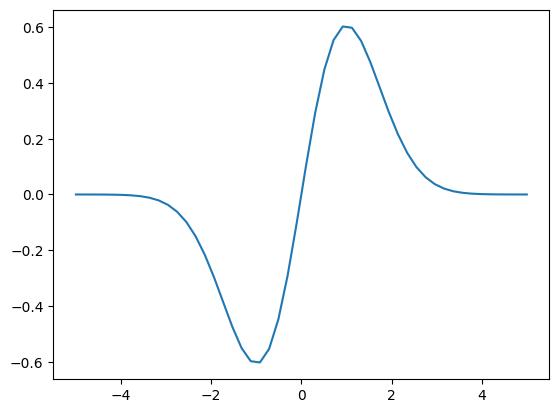

In [100]:
def wave_function(x, n):
    """
    计算n个粒子在二维空间中的波函数值
    :param x: 粒子的位置，数组，shape为(2,)
    :param n: 离散谱的能级
    :return: 波函数值，标量
    """
    p_monic = special.hermite(n, monic=True)
    psi = np.exp(-0.5 * x**2)
    return psi * p_monic(x)

num = 50
x = jnp.linspace(-5, 5, num)
real_wave_function = wave_function(x, 1)

plt.plot(x, real_wave_function)
plt.show()


## Automatic Differentiation For Potential Curve Fitting
Here we will implement automatic differentiation to fit a potential curve to theoritical data.

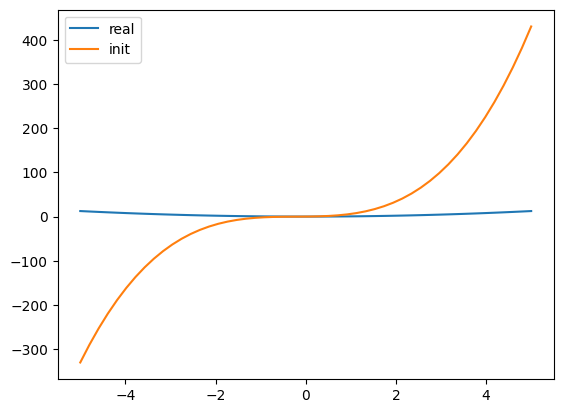

In [101]:
def v_d(a, b, c, x):
    """
    初始化势能
    :param x: 粒子的位置，数组，shape为(2,)
    :return: 势能值，标量
    """
    v = a*x + b*x**2 + c*x**3
    return v
def v_real(x):
    """
    初始化势能
    :param x: 粒子的位置，数组，shape为(2,)
    :return: 势能值，标量
    """
    v_real = 1/2*x**2
    return v_real
a = 1
b = 2
c = 3
v_real = v_real(x)
v_init = v(a, b, c ,x)
plt.plot(x, v_real, label='real')
plt.plot(x, v_init, label='init')
plt.legend()
plt.show()

In [102]:
#Kinetic Energy Calculation


print(K)

[[-2.  1.  0. ...  0.  0.  0.]
 [ 1. -2.  1. ...  0.  0.  0.]
 [ 0.  1. -2. ...  0.  0.  0.]
 ...
 [ 0.  0.  0. ... -2.  1.  0.]
 [ 0.  0.  0. ...  1. -2.  1.]
 [ 0.  0.  0. ...  0.  1. -2.]]


In [103]:
H_real = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        H_real[i,j] = (10/num)**(-2)*K[i,j] + v_real[i]*(i==j)
        
print(H_real)

H_init = np.zeros((num, num))
for i in range(num):
    for j in range(num):
        H_init[i,j] = (10/num)**(-2)*K[i,j] + v_init[i]**2*(i==j)
        
print(H_init)


[[-37.5         25.           0.         ...   0.           0.
    0.        ]
 [ 25.         -38.4995842   25.         ...   0.           0.
    0.        ]
 [  0.          25.         -39.45751572 ...   0.           0.
    0.        ]
 ...
 [  0.           0.           0.         ... -39.45751953  25.
    0.        ]
 [  0.           0.           0.         ...  25.         -38.4995842
   25.        ]
 [  0.           0.           0.         ...   0.          25.
  -37.5       ]]
[[1.08850000e+05 2.50000000e+01 0.00000000e+00 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [2.50000000e+01 8.38903516e+04 2.50000000e+01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 2.50000000e+01 6.38973242e+04 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.13665891e+05
  2.50000000e+01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 2.50000000e+01
  1.45666141e+05 2.50000000e+01]
 [0.00000000e

特征向量: [ 4.17717800e-05 -1.03226032e-04  2.09192100e-04 -3.97347656e-04
  7.27053769e-04 -1.29032813e-03  2.22513138e-03 -3.73019179e-03
  6.07936747e-03 -9.63208279e-03  1.48349243e-02 -2.22085008e-02
  3.23137780e-02 -4.56938872e-02  6.27913381e-02 -8.38463606e-02
  1.08789142e-01 -1.37145063e-01  1.67975920e-01 -1.99879182e-01
  2.31060591e-01 -2.59482819e-01  2.83077321e-01 -2.99990289e-01
  3.08822984e-01 -3.08823012e-01  2.99990370e-01 -2.83077453e-01
  2.59483000e-01 -2.31060776e-01  1.99879370e-01 -1.67976080e-01
  1.37145196e-01 -1.08789250e-01  8.38464480e-02 -6.27914083e-02
  4.56939446e-02 -3.23138203e-02  2.22085323e-02 -1.48349455e-02
  9.63209673e-03 -6.07937657e-03  3.73019785e-03 -2.22513521e-03
  1.29033036e-03 -7.27055052e-04  3.97348400e-04 -2.09192508e-04
  1.03226233e-04 -4.17718614e-05]


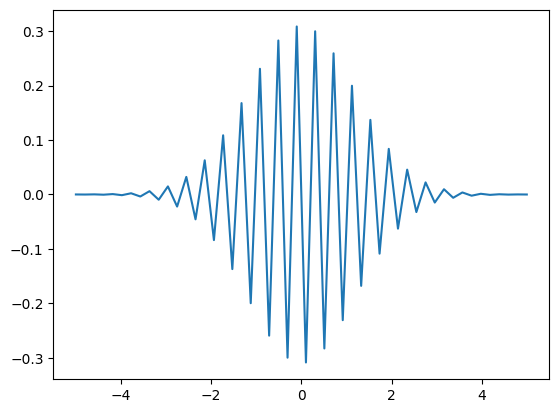

In [104]:
from scipy import linalg

# 求解H_init的特征值和特征向量
eigenvalues, eigenvectors = linalg.eig(H_real)

# 打印结果
print("特征向量:", eigenvectors[:,0])
plt.plot(x, eigenvectors[:,0])
plt.show()

In [139]:
def Hamiltonian(a, b, c, x, num=num):
    H = np.zeros((num, num))
    v = v_d(a, b, c, x)       
    K = np.zeros((num, num))
    for i in range(num):
     for j in range(num):
            if i==j:
                K[i,j] = -2
            elif i==j+1 or i==j-1:
                K[i,j]  = 1
            else:
                 K[i,j]  = 0
    for i in range(num):
        for j in range(num):
            H[i,j] = K[i,j] + v[i]*(i==j)
    return H

def loss(a,b,c):
    eigenvalues, eigenvalues = jax.scipy.linalg.eigh(Hamiltonian(a, b, c, x, num=num))
    real = real_wave_function
    cal = eigenvalues[0]
    loss = (real - cal)**2
    return jnp.sum(loss)
     
    
def train(a, b, c, num_epochs=1000, learning_rate=0.01):
    key = jax.random.key(0)
    a, b ,c = jax.random.split(key, 3)
    for epoch in range(num_epochs):
        # Compute the loss and gradients
        loss_value, grads = jax.value_and_grad(loss)(a, b, c)
        
        # Update the parameters
        a -= learning_rate * grads[0]
        b -= learning_rate * grads[1]
        c -= learning_rate * grads[2]
        
        # Print the loss value every 100 epochs
        if epoch % 100 == 0:
            print(f"Epoch {epoch}, loss = {loss_value}")
            
    return a, b, c
a, b, c = train(a, b, c, num_epochs=1000, learning_rate=0.01)
print(f"Final parameters: a={a}, b={b}, c={c}")

TypeError: grad requires real- or complex-valued inputs (input dtype that is a sub-dtype of np.inexact), but got key<fry>. If you want to use Boolean- or integer-valued inputs, use vjp or set allow_int to True.